In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Последовательное обнаружение разладок временных рядов

1. Всюду в рассматриваемых задачах
имеется две гипотезы $\mathbb{H}_0$ и $\mathbb{H}_1$ 
(иногда они обозначаются $\mathbb{H}_{\infty}$ и
$\mathbb{H}_0$, соответственно), причем каждая 
из гипотез делает явные предположения о распределении
или его параметрах.
* Критерий Неймана-Пирсона предписывает
принимать гипотезу исходя из значения величины
$$
L_n(X_1, \ldots, X_n) = \frac{f_0(X_1, \ldots, X_n)}{f_{\infty}(X_1, \ldots, X_n)},
$$
называемой отношением правдоподобия.
А именно, пусть $\varphi(X_1, \ldots, X_n)$~-- 
рандомизированное решающее правило, значение
которого равно вероятности принять 
гипотезу $\mathbb{H}_1$. Тогда найдутся такие
константы $\lambda_a$ и $h_a$, что 
$$
\varphi(X_1, \ldots, X_n) = 
\begin{cases}
    1, & L_n(X_1, \ldots, X_n) > h_a, \\
    \lambda_a, & L_n(X_1, \ldots, X_n) = h_a, \\
    0, & L_n(X_1, \ldots, X_n) < h_a,
\end{cases}
$$
является наиболее мощным 
(т.е. с наименьшей вероятностью пропуска цели 
или ошибки 2 рода $\beta(\varphi)$) тестом 
среди тестов, вероятность ложной
тревоги $\alpha(\varphi)$
(ошибки 1 рода) которых не выше $a$.

2. Разладкой процесса $X_t$
называется ситуация, в которой траектория
процесса генерируется двумя (или 
в общем случае несколькими) независимыми
вероятностными мерами $\mathrm{P}_{\infty}$
и $\mathrm{P}_{0}$, причем наблюдения имеют структуру
$$
X_n = 
\begin{cases}
    X^{\infty}_n, & \text{если } 1 \leqslant n < \theta, \\
    X^{0}_n, & \text{если } n \geqslant \theta,
\end{cases}
$$
где $X^{\infty}_t$ --- 
процесс, соответствующий мере $\mathrm{P}_{\infty}$,
и $X^{0}_t$ ---
процесс, соответствующий мере $\mathrm{P}_{0}$.
Момент $\theta \in [0, \infty]$
называется моментом разладки, причем
ситуация $\theta = 0$ соответствует тому, что 
с самого начала идут наблюдения от 
_разлаженного_ процесса $X^{0}$,
а ситуация $\theta = \infty$ заключается в том,
что разладка не появляется никогда.
Таким образом, траектория процесса $X$ выглядит
следующим образом:
$$
\underbrace{X^{\infty}_1, X^{\infty}_2, \ldots, 
X^{\infty}_{\theta - 1}}
    _{\text{мера } \mathrm{P}^{\infty}},
\underbrace{X^{0}_{\theta}, X^{0}_{\theta + 1}, \ldots}
    _{\text{мера } \mathrm{P}^{0}}
$$

3. **Статистика кумулятивных сумм.**

 - Вводятся статистики $\gamma_t$ 
 и $T_t$ 
$$
\gamma_n = \sup\limits_{\theta \geqslant 0} \frac{f_{\theta}(X_1, \ldots, X_n)}{f_{\infty}(X_1, \ldots, X_n)}
\qquad \mbox{и} \qquad T_n = \log \gamma_n
$$

 - Если случайные величины
$X_1, \ldots, X_n$ независимы, то
$$
\gamma_n = \max\Big\{1, \max\limits_{1 \leqslant \theta \leqslant n} \prod\limits_{k=\theta}^{n}
    \frac{f_{0}(X_k)}{f_{\infty}(X_k)} \Big\}
$$
$$
T_n = \max\Big\{0, \max\limits_{1 \leqslant \theta \leqslant n} \sum\limits_{k=\theta}^{n}
    \log \frac{f_{0}(X_k)}{f_{\infty}(X_k)} \Big\} = 
    \max\Big\{0, \max\limits_{1 \leqslant \theta \leqslant n} \sum\limits_{k=\theta}^{n}
    \zeta_k \Big\}
$$

 - Статистика $T_n$ обладает свойством $T_n = \max (0, T_{n-1} + \zeta_n)$
и называется статистикой кумулятивных сумм (CUmulative SUMs, CUSUM).

 - Момент остановки
$$
\tau_{\mathrm{CUSUM}} = \inf \{n \geqslant 0: T_n \geqslant B\},
$$
построенный по статистике кумулятивных сумм,
оптимален (т.\,е.~обладает наименьшей задержкой
в обнаружении разладки) в~классе
$$
\mathcal{M}_T = \{\tau : 
    {\textstyle \mathrm{E}_{\infty}} \tau \geqslant T\}
$$
тех моментов остановки, для которых среднее время
до~ложной тревоги не меньше $T$.

4. **Статистика Ширяева-Робертса.**

 - Вводится статистика
$$
R_n = \sum\limits_{\theta = 1}^{n} \frac{f_{\theta}(X_1, \ldots, X_n)}{f_{\infty}(X_1, \ldots, X_n)}
$$

 - Если случайные величины $X_1, \ldots, X_n$ независимы, то
$$
R_n = \sum\limits_{\theta = 1}^{n} \prod\limits_{k=\theta}^{n}
    \frac{f_{0}(X_k)}{f_{\infty}(X_k)} =
        \sum\limits_{\theta = 1}^{n} \prod\limits_{k=\theta}^{n}
    l_k.
$$ 

 - Статистика $R_n$ обладает свойством $R_n = (1 + R_{n-1}) l_k$ и~называется статистикой Ширяева-Робертса (Shiryaev-Roberts, SR).
 
 - Момент остановки 
$$
\tau_{\mathrm{SR}} = \inf \{n \geqslant 0: R_n \geqslant B\},
$$
построенный по статистике Ширяева-Робертса,
оптимален (т.е.~обладает наименьшей задержкой
в обнаружении разладки) в~классе
$$
\mathcal{M}_T = \{\tau : 
    {\textstyle \mathrm{E}_{\infty}} \tau \geqslant T\}
$$
тех моментов остановки, для которых среднее время
до~ложной тревоги не меньше $T$.


## Часть 1. Временные ряды с известными характеристиками

В этой части задания вы исследуете временные ряды с разладками, модель которых вам полностью известна.

Данные $X_1, \ldots, X_n$ порождены нормальным $\mathcal{N}(0, 1)$ распределением до момента появления разладки, и нормальным $\mathcal{N}(\mu, 1)$ распределением после момента появления разладки. Момент разладки $\theta = 100$ -- неизвестная величина.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

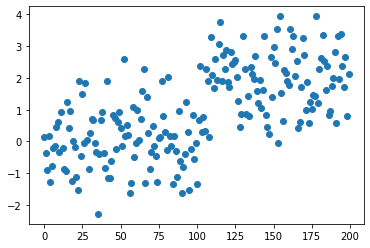

In [0]:
theta = 100
X = np.hstack((
    np.random.normal(loc=0, scale=1, size=theta),
    np.random.normal(loc=2, scale=1, size=100))
)
plot(X, 'o');

Заготовка для класса, реализующего статистику для обнаружения разладки, представлена ниже. Вам необходимо расширять этот класс.

In [0]:
class Stat(object):
    def __init__(self, threshold, direction="unknown", init_stat=0.0):
        self._direction = str(direction)
        self._threshold = float(threshold)
        self._stat = float(init_stat)
        self._alarm = self._stat / self._threshold
    
    @classmethod
    def from_config(cls, config):
        check_empty_config(config)
        return cls(threshold=1.0)
    
    @property
    def direction(self):
        return self._direction

    @property
    def stat(self):
        return self._stat
        
    @property
    def alarm(self):
        return self._alarm
        
    @property
    def threshold(self):
        return self._threshold
    
    @property
    def debug_output(self):
        return {self.__class__.__name__: self.alarm}
        
    def update(self, **kwargs):
        # Statistics may use any of the following kwargs:
        #   ts - timestamp for the value
        #   value - original value
        #   mean - current estimated mean
        #   std - current estimated std
        #   adjusted_value - usually (value - mean) / std
        # Statistics call this after updating '_stat'
        self._alarm = self._stat / self._threshold

**Задание 1.** Вычислите отношение правдоподобия для элемента выборки $X_i$. Реализуйте процедуру подсчета отношения правдоподобия для этого элемента выборки в предположении, что данные нормальны.

In [0]:
### your code here
def log_likelihood_ratio(x, mu0, mu8, sigma):
  return -1 / 2  / sigma ** 2 * (mu0 - mu8) * ((mu0 + mu8) - 2 * x)

In [0]:
print(log_likelihood_ratio(0, 0, 1, 1))
print(log_likelihood_ratio(0.5, 0, 1, 1))
print(log_likelihood_ratio(1, 0, 1, 1))

0.5
0.0
-0.5


**Задание 2.** Постройте статистику кумулятивных сумм для обнаружения разладки в среднем значении процесса $X_n$. В какой момент $\tau$ следует подавать сигнал тревоги об обнаружении разладки?

In [0]:
### your code here
class CUSUM_Stat(Stat):
  def set_hypothesis(self, mu0, mu8, sigma):
    self.mu0 = mu0
    self.mu8 = mu8
    self.sigma = sigma
    
  def update(self, value):
    log_likelihood_ratio_value = log_likelihood_ratio(value, self.mu0, self.mu8, self.sigma)
    self._stat = np.max([0, log_likelihood_ratio_value + self._stat])
    return self._stat

In [0]:
cumsum_statistics = CUSUM_Stat(1)
cumsum_statistics.set_hypothesis(0., 1., 1.)
cumsum_statistics.update(-4)

4.5

In [0]:
cumsum_statistics.set_hypothesis(0., 1., 1.)
print(cumsum_statistics.mu0, 
      cumsum_statistics.mu8,
      cumsum_statistics.sigma)

0.0 1.0 1.0


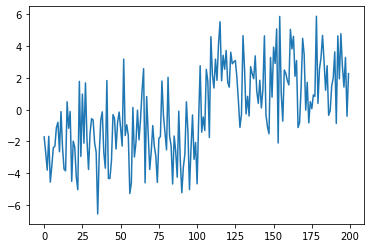

In [0]:
log_likelihood_ratio_list = []
mu0 = 2
mu8 = 0
sigma = 1

for x in X:
  log_likelihood_ratio_list.append(log_likelihood_ratio(x, mu0, mu8, sigma))
  
plt.plot(log_likelihood_ratio_list)  

In [0]:
mu0 = 1
mu8 = 0
sigma = 1

monte_carlo_number = 200
threshold = 10

theta = 100
delay_array = np.zeros((monte_carlo_number, 1))
false_alarm_number = 0 
for index in range(monte_carlo_number):
  X = np.hstack((
      np.random.normal(loc=mu8, scale=sigma, size=theta),
      np.random.normal(loc=mu0, scale=sigma, size=100))
  )

  cusum_statistics = CUSUM_Stat(1)
  cusum_statistics.set_hypothesis(mu0, mu8, sigma)

  statistics_list = []

  for x in X:
    statistics_list.append(cusum_statistics.update(x))
  
  if len(np.where(np.array(statistics_list[theta:]) > threshold)[0]) > 0:
    alarm = np.min(np.where(np.array(statistics_list[theta:]) > threshold)[0]) + theta
    is_false_alarm = np.min(np.where(np.array(statistics_list) > threshold)[0]) < theta
    delay_array[index] = alarm - theta
    false_alarm_number += is_false_alarm

  # plt.plot(statistics_list);

In [0]:
print(np.mean(delay_array), false_alarm_number / monte_carlo_number)

18.4 0.0


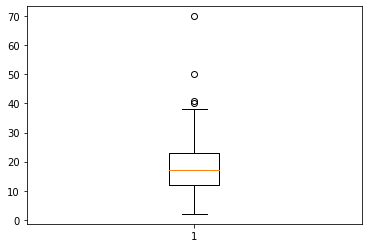

In [0]:
plt.boxplot(delay_array);

In [0]:
mu0 = 1
mu8 = 0
sigma = 1

monte_carlo_number = 200
threshold = 10

theta = 0
delay_array_zero = np.zeros((monte_carlo_number, 1))
false_alarm_number = 0 
for index in range(monte_carlo_number):
  X = np.hstack((
      np.random.normal(loc=mu8, scale=sigma, size=theta),
      np.random.normal(loc=mu0, scale=sigma, size=100))
  )

  cusum_statistics = CUSUM_Stat(1)
  cusum_statistics.set_hypothesis(mu0, mu8, sigma)

  statistics_list = []

  for x in X:
    statistics_list.append(cusum_statistics.update(x))
  
  if len(np.where(np.array(statistics_list[theta:]) > threshold)[0]) > 0:
    alarm = np.min(np.where(np.array(statistics_list[theta:]) > threshold)[0]) + theta
    is_false_alarm = np.min(np.where(np.array(statistics_list) > threshold)[0]) < theta
    delay_array_zero[index] = alarm - theta
    false_alarm_number += is_false_alarm

  # plt.plot(statistics_list);

18.665 9.086406055201364
20.525 9.15693043546799


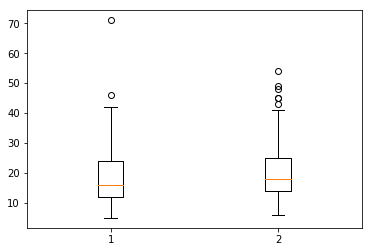

In [0]:
plt.boxplot([delay_array, delay_array_zero]);
print(np.mean(delay_array), np.std(delay_array))

print(np.mean(delay_array_zero), np.std(delay_array_zero))

**Задание 3.** Проведите моделирование Монте-Карло для подсчета средней величины задержки в обнаружении разладки для заданных данных. 

_Подсказка:_ сгенерируйте $N$ независимых выборок, для каждой из них вычислите значения статистики кумулятивных сумм и момент подачи тревоги $\tau$. Полученные _задержки_ $\tau - \theta$ усредните.

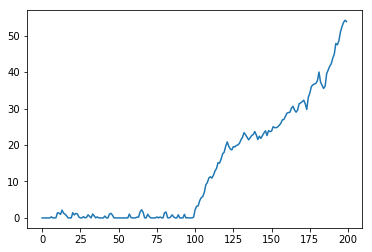

In [0]:
### your code here
mu0 = 1
mu8 = 0
sigma = 1

cusum_statistics = CUSUM_Stat(1)
cusum_statistics.set_hypothesis(mu0, mu8, sigma)

statistics_list = []

for x in X:
  statistics_list.append(cusum_statistics.update(x))
  
plt.plot(statistics_list);

**Задание 4.** Проведите моделирование Монте-Карло для подсчета зависимости средней величины задержки в обнаружении разладки, которая появляется в момент времени $\theta = 0$, от значения порога срабатывания $h$. Отобразите полученную зависимость.

_Подсказка:_ для нескольких значений порога срабатывания $h$ сгенерируйте $N$ независимых выборок из распределения _с разладкой_ $\mathrm{P}_{0}$, для каждой из них вычислите значения статистики кумулятивных сумм и момент подачи тревоги $\tau$. Полученные _задержки_ $\tau - \theta$ усредните.

In [0]:
### your code here

## Часть 2. Временные ряды с неизвестными характеристиками

В этой части задания вам необходимо разработать процедуру обнаружения разладки для данных, распределение которых вам неизвестно. Вам задан набор данных `seminar.train_data`. Процедура чтения данных уже реализована.

In [0]:
from datasets import read_simple_dataset
from itertools import izip

In [0]:
with open('seminar.train_data') as f:
    data, changepoint, targets = read_simple_dataset(f, keep_target=True)

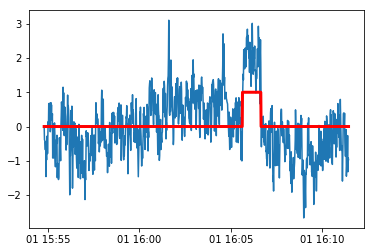

In [0]:
timestamps, values, changepoint = [], [], []
for (ts, value), cp_indicator in izip(data[1], targets[1]):
    timestamps.append(ts)
    values.append(value)
    changepoint.append(cp_indicator)
plot(timestamps, values)
plot(timestamps, changepoint, 'r', linewidth=3)

**Задание 1.** Модифицируйте процедуру кумулятивных сумм для случая, когда среднее значение временного ряда после разладки неизвестно.

In [0]:
### your code here

**Задание 2.** Реализуйте процедуру оценивания среднего значения временного ряда с помощью скользящего среднего. Постройте статистику кумулятивных сумм для обнаружения разладки в среднем значении процесса $X_n$. В какой момент $\tau$ следует подавать сигнал тревоги об обнаружении разладки?

In [0]:
### your code here

**Задание 3.** Постройте статистику Ширяева-Робертса для обнаружения разладки в дисперсии временного ряда.

Данные $X_1, \ldots, X_n$ порождены нормальным $\mathcal{N}(0, \sigma^2_{\infty})$ распределением до момента появления разладки, и нормальным $\mathcal{N}(0, \sigma^2_{0})$ распределением после момента появления разладки. Момент разладки $\theta$ -- неизвестная величина.

In [0]:
### your code here

**Задание 4.** Модифицируйте процедуру обнаружения разладки с помощью статистики Ширяева-Робертса для обнаружения разладки в дисперсии временного ряда, заданного данными из файлов. Подсказка: постройте вначале процедуру оценивания значения дисперсии до момента разладки, а затем воспользуйтесь идеей из Задания 1.

In [0]:
with open('seminar_var.train_data') as f:
    data_var, changepoint_var, targets_var = read_simple_dataset(f, keep_target=True)

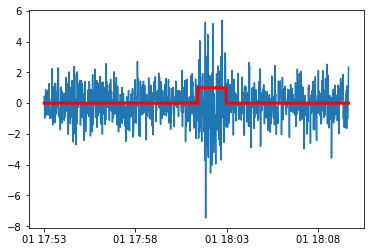

In [0]:
timestamps, values, changepoint = [], [], []
for (ts, value), cp_indicator in izip(data_var[0], targets_var[0]):
    timestamps.append(ts)
    values.append(value)
    changepoint.append(cp_indicator)
plot(timestamps, values)
plot(timestamps, changepoint, 'r', linewidth=3)

In [0]:
### your code here